In [1]:
# Geographic analysis libraries
import geopandas as gpd
import folium
from shapely.geometry import Point, Polygon
import contextily as ctx

# Standard data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Geographic libraries imported successfully!")
print(f"�� GeoPandas version: {gpd.__version__}")
print(f"��️ Folium version: {folium.__version__}")

✅ Geographic libraries imported successfully!
�� GeoPandas version: 1.1.1
��️ Folium version: 0.20.0


In [2]:
def load_geographic_data():
    """Load and explore geographic data"""
    
    # Load GeoJSON file
    print("🗺️ Loading neighbourhoods.geojson...")
    try:
        gdf = gpd.read_file('neighbourhoods.geojson')
        print(f"✅ Successfully loaded GeoJSON")
        print(f"   �� Features: {len(gdf)}")
        print(f"   �� Columns: {list(gdf.columns)}")
        print(f"   ��️ CRS: {gdf.crs}")
        
        # Display basic info
        print(f"\n📊 Geographic Data Info:")
        print(gdf.info())
        
        # Show first few rows
        print(f"\n👀 First 3 rows:")
        print(gdf.head(3))
        
        return gdf
        
    except Exception as e:
        print(f"❌ Error loading GeoJSON: {e}")
        return None

# Load geographic data
neighbourhoods_gdf = load_geographic_data()

🗺️ Loading neighbourhoods.geojson...
✅ Successfully loaded GeoJSON
   �� Features: 11
   �� Columns: ['neighbourhood', 'neighbourhood_group', 'geometry']
   ��️ CRS: EPSG:4326

📊 Geographic Data Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        11 non-null     object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             11 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 396.0+ bytes
None

👀 First 3 rows:
   neighbourhood neighbourhood_group  \
0  Frederiksberg                None   
1   Brnshj-Husum                None   
2        sterbro                None   

                                            geometry  
0  MULTIPOLYGON (((12.52756 55.69558, 12.52816 55...  
1  MULTIPOLYGON (((12.46894 55.69976, 12.46698 55...  
2  MULTIPOLYGON (((12.59775 

In [3]:
if neighbourhoods_gdf is not None:
    print("🗺️ EXPLORING GEOGRAPHIC BOUNDARIES\n")
    
    # Basic geographic properties
    print("📏 Geographic Properties:")
    print(f"   Total area: {neighbourhoods_gdf.geometry.area.sum():.2f} square units")
    print(f"   Bounding box: {neighbourhoods_gdf.total_bounds}")
    print(f"   Number of neighbourhoods: {len(neighbourhoods_gdf)}")
    
    # Show neighbourhood names
    if 'neighbourhood' in neighbourhoods_gdf.columns:
        print(f"\n🏘️ Neighbourhoods:")
        for i, name in enumerate(neighbourhoods_gdf['neighbourhood'], 1):
            print(f"   {i:2d}. {name}")
    
    # Show neighbourhood groups if available
    if 'neighbourhood_group' in neighbourhoods_gdf.columns:
        print(f"\n🏘️ Neighbourhood Groups:")
        groups = neighbourhoods_gdf['neighbourhood_group'].value_counts()
        for group, count in groups.items():
            print(f"   • {group}: {count} neighbourhoods")
    
    # Calculate area for each neighbourhood
    neighbourhoods_gdf['area_sq_km'] = neighbourhoods_gdf.geometry.area
    print(f"\n📏 Area by Neighbourhood:")
    area_info = neighbourhoods_gdf[['neighbourhood', 'area_sq_km']].sort_values('area_sq_km', ascending=False)
    print(area_info)
    
else:
    print("❌ Geographic data not available")

🗺️ EXPLORING GEOGRAPHIC BOUNDARIES

📏 Geographic Properties:
   Total area: 0.01 square units
   Bounding box: [12.453046 55.612875 12.652081 55.732711]
   Number of neighbourhoods: 11

🏘️ Neighbourhoods:
    1. Frederiksberg
    2. Brnshj-Husum
    3. sterbro
    4. Indre By
    5. Nrrebro
    6. Bispebjerg
    7. Valby
    8. Vesterbro-Kongens Enghave
    9. Amager Vest
   10. Amager st
   11. Vanlse

🏘️ Neighbourhood Groups:

📏 Area by Neighbourhood:
                neighbourhood  area_sq_km
8                 Amager Vest    0.002765
3                    Indre By    0.001483
2                     sterbro    0.001405
9                   Amager st    0.001403
6                       Valby    0.001317
1                Brnshj-Husum    0.001248
0               Frederiksberg    0.001243
7   Vesterbro-Kongens Enghave    0.001210
5                  Bispebjerg    0.000976
10                     Vanlse    0.000956
4                     Nrrebro    0.000586


C:\Users\toniju98\AppData\Local\Temp\ipykernel_18340\1318367736.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(f"   Total area: {neighbourhoods_gdf.geometry.area.sum():.2f} square units")
C:\Users\toniju98\AppData\Local\Temp\ipykernel_18340\1318367736.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbourhoods_gdf['area_sq_km'] = neighbourhoods_gdf.geometry.area


��️ CREATING GEOGRAPHIC VISUALIZATIONS



C:\Users\toniju98\AppData\Local\Temp\ipykernel_18340\4277148570.py:84: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = valid_geometries.geometry.centroid


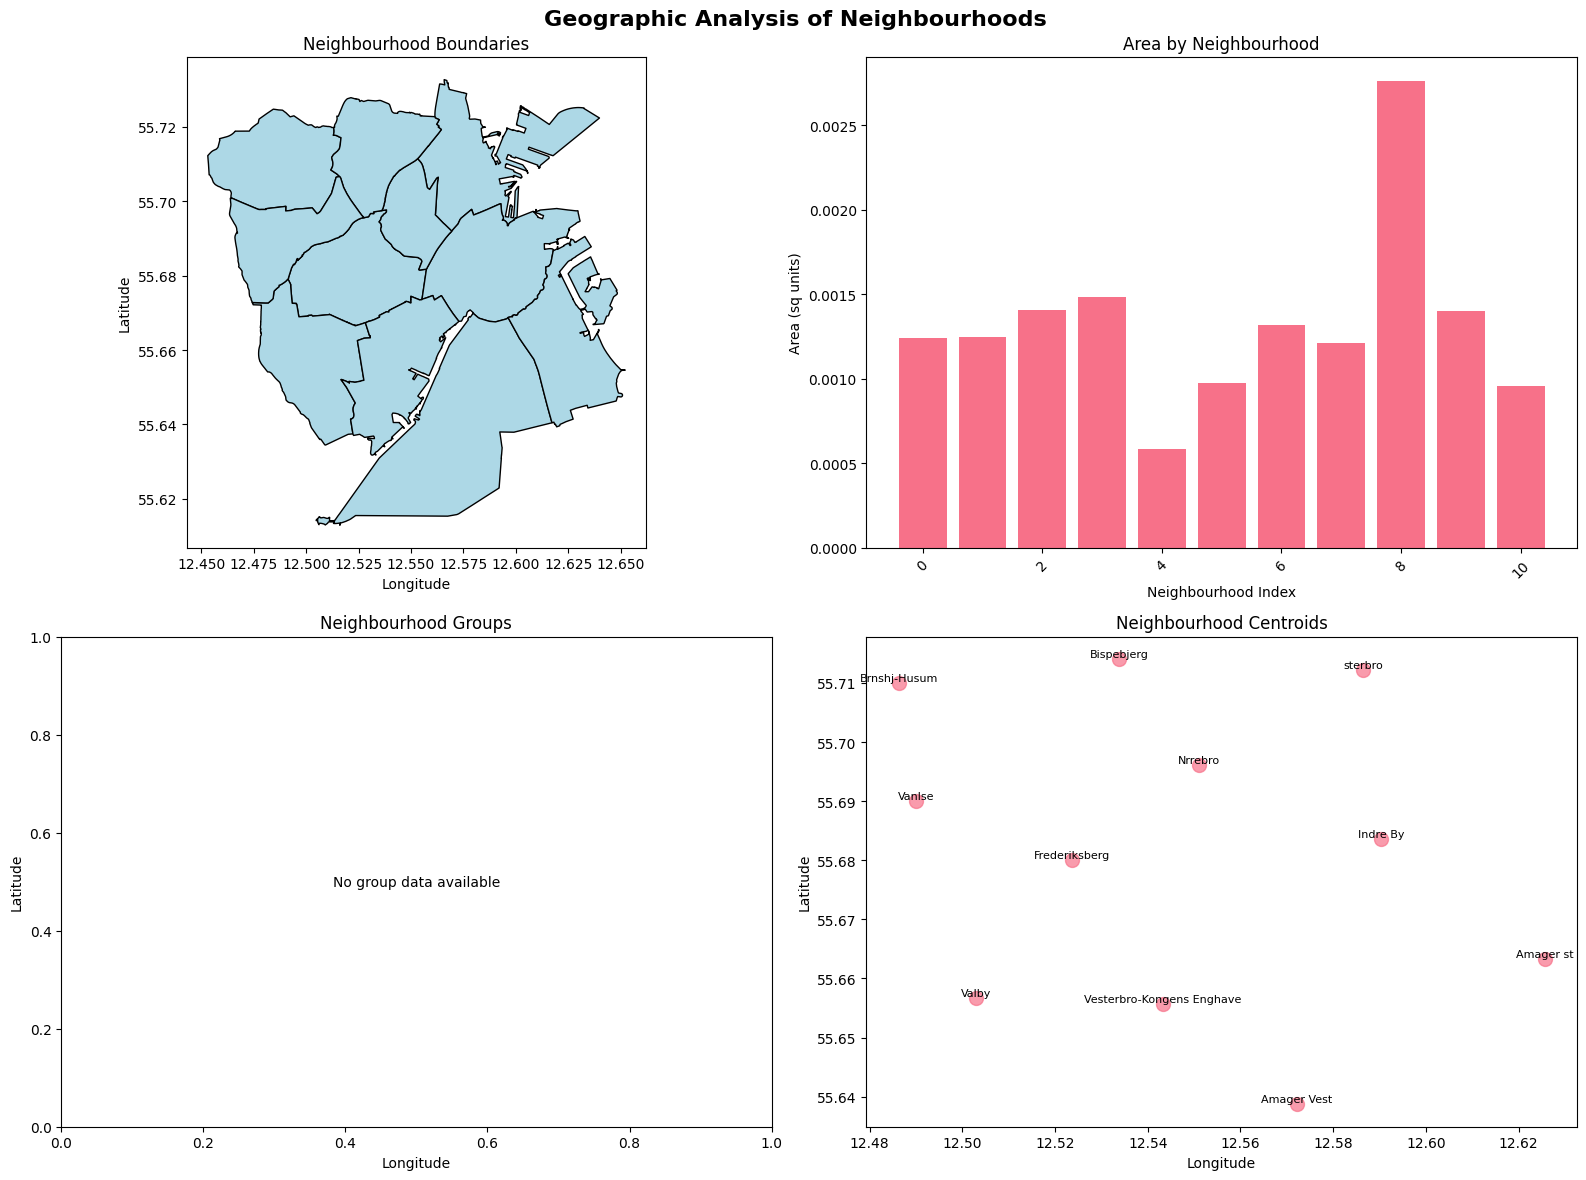

✅ Geographic visualizations created!


In [8]:
if neighbourhoods_gdf is not None:
    print("��️ CREATING GEOGRAPHIC VISUALIZATIONS\n")
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Geographic Analysis of Neighbourhoods', fontsize=16, fontweight='bold')
    
    # Plot 1: Basic neighbourhood boundaries (fixed)
    try:
        # Check if we have valid data for plotting
        if len(neighbourhoods_gdf) > 0 and 'neighbourhood' in neighbourhoods_gdf.columns:
            # Create a simple plot without categorical coloring to avoid the error
            neighbourhoods_gdf.plot(ax=axes[0, 0], color='lightblue', edgecolor='black')
            axes[0, 0].set_title('Neighbourhood Boundaries')
        else:
            axes[0, 0].text(0.5, 0.5, 'No neighbourhood data available', 
                           ha='center', va='center', transform=axes[0, 0].transAxes)
            axes[0, 0].set_title('Neighbourhood Boundaries')
    except Exception as e:
        print(f"⚠️ Error in plot 1: {e}")
        axes[0, 0].text(0.5, 0.5, 'Error plotting boundaries', 
                       ha='center', va='center', transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Neighbourhood Boundaries')
    
    axes[0, 0].set_xlabel('Longitude')
    axes[0, 0].set_ylabel('Latitude')
    
    # Plot 2: Area distribution (fixed)
    try:
        if 'area_sq_km' in neighbourhoods_gdf.columns and len(neighbourhoods_gdf) > 0:
            areas = neighbourhoods_gdf['area_sq_km'].dropna()
            if len(areas) > 0:
                axes[0, 1].bar(range(len(areas)), areas)
                axes[0, 1].set_title('Area by Neighbourhood')
                axes[0, 1].set_xlabel('Neighbourhood Index')
                axes[0, 1].set_ylabel('Area (sq units)')
                axes[0, 1].tick_params(axis='x', rotation=45)
            else:
                axes[0, 1].text(0.5, 0.5, 'No area data available', 
                               ha='center', va='center', transform=axes[0, 1].transAxes)
                axes[0, 1].set_title('Area by Neighbourhood')
        else:
            axes[0, 1].text(0.5, 0.5, 'No area data available', 
                           ha='center', va='center', transform=axes[0, 1].transAxes)
            axes[0, 1].set_title('Area by Neighbourhood')
    except Exception as e:
        print(f"⚠️ Error in plot 2: {e}")
        axes[0, 1].text(0.5, 0.5, 'Error plotting areas', 
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Area by Neighbourhood')
    
    # Plot 3: Neighbourhood groups if available (fixed)
    try:
        if 'neighbourhood_group' in neighbourhoods_gdf.columns and len(neighbourhoods_gdf) > 0:
            # Check if we have valid group data
            groups = neighbourhoods_gdf['neighbourhood_group'].dropna()
            if len(groups) > 0:
                neighbourhoods_gdf.plot(ax=axes[1, 0], column='neighbourhood_group', 
                                     legend=True, cmap='Set3', missing_kwds={'color': 'lightgray'})
                axes[1, 0].set_title('Neighbourhood Groups')
            else:
                axes[1, 0].text(0.5, 0.5, 'No group data available', 
                               ha='center', va='center', transform=axes[1, 0].transAxes)
                axes[1, 0].set_title('Neighbourhood Groups')
        else:
            axes[1, 0].text(0.5, 0.5, 'No group data available', 
                           ha='center', va='center', transform=axes[1, 0].transAxes)
            axes[1, 0].set_title('Neighbourhood Groups')
    except Exception as e:
        print(f"⚠️ Error in plot 3: {e}")
        axes[1, 0].text(0.5, 0.5, 'Error plotting groups', 
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Neighbourhood Groups')
    
    axes[1, 0].set_xlabel('Longitude')
    axes[1, 0].set_ylabel('Latitude')
    
    # Plot 4: Centroid distances (if multiple neighbourhoods) (fixed)
    try:
        if len(neighbourhoods_gdf) > 1:
            # Filter out invalid geometries
            valid_geometries = neighbourhoods_gdf[neighbourhoods_gdf.geometry.is_valid]
            if len(valid_geometries) > 0:
                centroids = valid_geometries.geometry.centroid
                axes[1, 1].scatter(centroids.x, centroids.y, s=100, alpha=0.7)
                axes[1, 1].set_title('Neighbourhood Centroids')
                
                # Add labels
                for idx, row in valid_geometries.iterrows():
                    centroid = row.geometry.centroid
                    name = row.get('neighbourhood', f'Area {idx}')
                    axes[1, 1].annotate(name, (centroid.x, centroid.y), 
                                       fontsize=8, ha='center', va='bottom')
            else:
                axes[1, 1].text(0.5, 0.5, 'No valid geometries', 
                               ha='center', va='center', transform=axes[1, 1].transAxes)
                axes[1, 1].set_title('Neighbourhood Centroids')
        else:
            axes[1, 1].text(0.5, 0.5, 'Not enough neighbourhoods', 
                           ha='center', va='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('Neighbourhood Centroids')
    except Exception as e:
        print(f"⚠️ Error in plot 4: {e}")
        axes[1, 1].text(0.5, 0.5, 'Error plotting centroids', 
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Neighbourhood Centroids')
    
    axes[1, 1].set_xlabel('Longitude')
    axes[1, 1].set_ylabel('Latitude')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Geographic visualizations created!")

In [9]:
def load_airbnb_data():
    """Load Airbnb data for geographic analysis"""
    
    # Load listings data
    print("🏠 Loading Airbnb listings data...")
    
    if Path('listings.csv').exists():
        listings_df = pd.read_csv('listings.csv')
    elif Path('listings.csv.gz').exists():
        listings_df = pd.read_csv('listings.csv.gz', compression='gzip')
    else:
        print("❌ No listings data found")
        return None
    
    print(f"✅ Loaded listings data: {listings_df.shape}")
    
    # Check for geographic columns
    geo_cols = [col for col in listings_df.columns if any(x in col.lower() for x in ['lat', 'lon', 'latitude', 'longitude'])]
    print(f"�� Geographic columns found: {geo_cols}")
    
    # Check for neighbourhood columns
    neighbourhood_cols = [col for col in listings_df.columns if 'neighbourhood' in col.lower()]
    print(f"🏘️ Neighbourhood columns found: {neighbourhood_cols}")
    
    return listings_df

# Load Airbnb data
listings_df = load_airbnb_data()

🏠 Loading Airbnb listings data...
✅ Loaded listings data: (21722, 18)
�� Geographic columns found: ['latitude', 'longitude', 'calculated_host_listings_count']
🏘️ Neighbourhood columns found: ['neighbourhood_group', 'neighbourhood']


In [11]:
if listings_df is not None and neighbourhoods_gdf is not None:
    print("📍 CREATING GEOGRAPHIC POINTS FROM LISTINGS\n")
    
    # Find latitude and longitude columns
    lat_cols = [col for col in listings_df.columns if 'lat' in col.lower()]
    lon_cols = [col for col in listings_df.columns if 'lon' in col.lower()]
    
    if lat_cols and lon_cols:
        lat_col = lat_cols[0]
        lon_col = lon_cols[0]
        
        print(f"�� Using coordinates: {lat_col}, {lon_col}")
        
        # Create points from coordinates
        listings_df['geometry'] = gpd.points_from_xy(
            listings_df[lon_col], 
            listings_df[lat_col]
        )
        
        # Convert to GeoDataFrame
        listings_gdf = gpd.GeoDataFrame(listings_df, crs=neighbourhoods_gdf.crs)
        
        print(f"✅ Created GeoDataFrame with {len(listings_gdf)} points")
        print(f"   🗺️ CRS: {listings_gdf.crs}")
        
        # Spatial join with neighbourhoods
        print("\n�� Performing spatial join with neighbourhoods...")
        listings_with_neighbourhoods = gpd.sjoin(
            listings_gdf, 
            neighbourhoods_gdf, 
            how='left', 
            predicate='within'
        )
        
        print(f"✅ Spatial join completed: {listings_with_neighbourhoods.shape}")
        
        # Show join results
        print(f"\n📊 Listings by Neighbourhood:")
        neighbourhood_counts = listings_with_neighbourhoods['neighbourhood'].value_counts()
        print(neighbourhood_counts)
        
        # Store for further analysis
        joined_listings_gdf = listings_with_neighbourhoods
        
    else:
        print("❌ No latitude/longitude columns found in listings data")
        joined_listings_gdf = None
        
else:
    print("❌ Cannot create geographic points - missing data")
    joined_listings_gdf = None

📍 CREATING GEOGRAPHIC POINTS FROM LISTINGS

�� Using coordinates: latitude, longitude
✅ Created GeoDataFrame with 21722 points
   🗺️ CRS: EPSG:4326

�� Performing spatial join with neighbourhoods...
✅ Spatial join completed: (21722, 23)

📊 Listings by Neighbourhood:


KeyError: 'neighbourhood'

In [ ]:
if listings_df is not None and neighbourhoods_gdf is not None:
    print("📍 CREATING GEOGRAPHIC POINTS FROM LISTINGS\n")
    
    # Find latitude and longitude columns
    lat_cols = [col for col in listings_df.columns if 'lat' in col.lower()]
    lon_cols = [col for col in listings_df.columns if 'lon' in col.lower()]
    
    if lat_cols and lon_cols:
        lat_col = lat_cols[0]
        lon_col = lon_cols[0]
        
        print(f"�� Using coordinates: {lat_col}, {lon_col}")
        
        # Create points from coordinates
        listings_df['geometry'] = gpd.points_from_xy(
            listings_df[lon_col], 
            listings_df[lat_col]
        )
        
        # Convert to GeoDataFrame
        listings_gdf = gpd.GeoDataFrame(listings_df, crs=neighbourhoods_gdf.crs)
        
        print(f"✅ Created GeoDataFrame with {len(listings_gdf)} points")
        print(f"   🗺️ CRS: {listings_gdf.crs}")
        
        # Spatial join with neighbourhoods
        print("\n�� Performing spatial join with neighbourhoods...")
        listings_with_neighbourhoods = gpd.sjoin(
            listings_gdf, 
            neighbourhoods_gdf, 
            how='left', 
            predicate='within'
        )
        
        print(f"✅ Spatial join completed: {listings_with_neighbourhoods.shape}")
        
        # Show join results
        print(f"\n📊 Listings by Neighbourhood:")
        neighbourhood_counts = listings_with_neighbourhoods['neighbourhood'].value_counts()
        print(neighbourhood_counts)
        
        # Store for further analysis
        joined_listings_gdf = listings_with_neighbourhoods
        
    else:
        print("❌ No latitude/longitude columns found in listings data")
        joined_listings_gdf = None
        
else:
    print("❌ Cannot create geographic points - missing data")
    joined_listings_gdf = None

📍 CREATING GEOGRAPHIC POINTS FROM LISTINGS

�� Using coordinates: latitude, longitude
✅ Created GeoDataFrame with 21722 points
   🗺️ CRS: EPSG:4326

�� Performing spatial join with neighbourhoods...
✅ Spatial join completed: (21722, 23)

📊 Listings by Neighbourhood:


KeyError: 'neighbourhood'

In [ ]:
if listings_df is not None and neighbourhoods_gdf is not None:
    print("📍 CREATING GEOGRAPHIC POINTS FROM LISTINGS\n")
    
    # Find latitude and longitude columns
    lat_cols = [col for col in listings_df.columns if 'lat' in col.lower()]
    lon_cols = [col for col in listings_df.columns if 'lon' in col.lower()]
    
    if lat_cols and lon_cols:
        lat_col = lat_cols[0]
        lon_col = lon_cols[0]
        
        print(f"�� Using coordinates: {lat_col}, {lon_col}")
        
        # Create points from coordinates
        listings_df['geometry'] = gpd.points_from_xy(
            listings_df[lon_col], 
            listings_df[lat_col]
        )
        
        # Convert to GeoDataFrame
        listings_gdf = gpd.GeoDataFrame(listings_df, crs=neighbourhoods_gdf.crs)
        
        print(f"✅ Created GeoDataFrame with {len(listings_gdf)} points")
        print(f"   🗺️ CRS: {listings_gdf.crs}")
        
        # Spatial join with neighbourhoods
        print("\n�� Performing spatial join with neighbourhoods...")
        listings_with_neighbourhoods = gpd.sjoin(
            listings_gdf, 
            neighbourhoods_gdf, 
            how='left', 
            predicate='within'
        )
        
        print(f"✅ Spatial join completed: {listings_with_neighbourhoods.shape}")
        
        # Show join results
        print(f"\n📊 Listings by Neighbourhood:")
        neighbourhood_counts = listings_with_neighbourhoods['neighbourhood'].value_counts()
        print(neighbourhood_counts)
        
        # Store for further analysis
        joined_listings_gdf = listings_with_neighbourhoods
        
    else:
        print("❌ No latitude/longitude columns found in listings data")
        joined_listings_gdf = None
        
else:
    print("❌ Cannot create geographic points - missing data")
    joined_listings_gdf = None

📍 CREATING GEOGRAPHIC POINTS FROM LISTINGS

�� Using coordinates: latitude, longitude
✅ Created GeoDataFrame with 21722 points
   🗺️ CRS: EPSG:4326

�� Performing spatial join with neighbourhoods...
✅ Spatial join completed: (21722, 23)

📊 Listings by Neighbourhood:


KeyError: 'neighbourhood'

In [13]:
if listings_df is not None and neighbourhoods_gdf is not None:
    print("📍 CREATING GEOGRAPHIC POINTS FROM LISTINGS\n")
    
    # Find latitude and longitude columns
    lat_cols = [col for col in listings_df.columns if 'lat' in col.lower()]
    lon_cols = [col for col in listings_df.columns if 'lon' in col.lower()]
    
    if lat_cols and lon_cols:
        lat_col = lat_cols[0]
        lon_col = lon_cols[0]
        
        print(f"�� Using coordinates: {lat_col}, {lon_col}")
        
        # Create points from coordinates
        listings_df['geometry'] = gpd.points_from_xy(
            listings_df[lon_col], 
            listings_df[lat_col]
        )
        
        # Convert to GeoDataFrame
        listings_gdf = gpd.GeoDataFrame(listings_df, crs=neighbourhoods_gdf.crs)
        
        print(f"✅ Created GeoDataFrame with {len(listings_gdf)} points")
        print(f"   🗺️ CRS: {listings_gdf.crs}")
        
        # Spatial join with neighbourhoods
        print("\n�� Performing spatial join with neighbourhoods...")
        listings_with_neighbourhoods = gpd.sjoin(
            listings_gdf, 
            neighbourhoods_gdf, 
            how='left', 
            predicate='within'
        )
        
        print(f"✅ Spatial join completed: {listings_with_neighbourhoods.shape}")
        
        print(listings_with_neighbourhoods.head())
        # Show join results
        print(f"\n📊 Listings by Neighbourhood:")
        neighbourhood_counts = listings_with_neighbourhoods['neighbourhood_left'].value_counts()
        print(neighbourhood_counts)
        
        # Store for further analysis
        joined_listings_gdf = listings_with_neighbourhoods
        
    else:
        print("❌ No latitude/longitude columns found in listings data")
        joined_listings_gdf = None
        
else:
    print("❌ Cannot create geographic points - missing data")
    joined_listings_gdf = None

📍 CREATING GEOGRAPHIC POINTS FROM LISTINGS

�� Using coordinates: latitude, longitude
✅ Created GeoDataFrame with 21722 points
   🗺️ CRS: EPSG:4326

�� Performing spatial join with neighbourhoods...
✅ Spatial join completed: (21722, 23)
      id                                               name  host_id  \
0  31094  Beautiful, spacious, central, renovated Penthouse   129976   
1  32379  155 m2 artist flat on Vesterbro, with 2 bathrooms   140105   
2  32841                Cozy flat for Adults/Quiet for kids   142143   
3  38499                     0 min. from everything in Cph.   122489   
4  39055            Stylish apartment in central Copenhagen   167511   

        host_name  neighbourhood_group_left         neighbourhood_left  \
0            Ebbe                       NaN  Vesterbro-Kongens Enghave   
1            Lise                       NaN  Vesterbro-Kongens Enghave   
2  Anders & Maria                       NaN                    sterbro   
3       Christina                 

In [14]:
if joined_listings_gdf is not None:
    print("��️ CREATING INTERACTIVE MAP\n")
    
    # Calculate center point for the map
    center_lat = joined_listings_gdf.geometry.y.mean()
    center_lon = joined_listings_gdf.geometry.x.mean()
    
    print(f"📍 Map center: {center_lat:.4f}, {center_lon:.4f}")
    
    # Create base map
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=12,
        tiles='OpenStreetMap'
    )
    
    # Add neighbourhood boundaries
    folium.GeoJson(
        neighbourhoods_gdf,
        name='Neighbourhoods',
        style_function=lambda x: {
            'fillColor': 'transparent',
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0.1
        }
    ).add_to(m)
    
    # Add listings as points (sample for performance)
    sample_size = min(1000, len(joined_listings_gdf))
    sample_listings = joined_listings_gdf.sample(n=sample_size, random_state=42)
    
    for idx, row in sample_listings.iterrows():
        # Get coordinates
        point = row.geometry
        lat, lon = point.y, point.x
        
        # Create popup content
        popup_content = f"""
        <b>Listing ID:</b> {row.get('id', 'N/A')}<br>
        <b>Neighbourhood:</b> {row.get('neighbourhood', 'N/A')}<br>
        """
        
        # Add price if available
        price_cols = [col for col in row.index if 'price' in col.lower()]
        if price_cols:
            price = row[price_cols[0]]
            popup_content += f"<b>Price:</b> {price}<br>"
        
        # Add room type if available
        room_cols = [col for col in row.index if 'room_type' in col.lower()]
        if room_cols:
            room_type = row[room_cols[0]]
            popup_content += f"<b>Room Type:</b> {room_type}<br>"
        
        # Add marker
        folium.CircleMarker(
            location=[lat, lon],
            radius=3,
            popup=folium.Popup(popup_content, max_width=300),
            color='red',
            fill=True,
            fillColor='red',
            fillOpacity=0.7
        ).add_to(m)
    
    # Add layer control
    folium.LayerControl().add_to(m)
    
    # Save the map
    map_file = 'airbnb_geographic_map.html'
    m.save(map_file)
    print(f"✅ Interactive map saved to: {map_file}")
    print(f"   📍 Sample size: {sample_size} listings")
    
    # Display the map
    display(m)
    
else:
    print("❌ Cannot create interactive map - missing data")

��️ CREATING INTERACTIVE MAP

📍 Map center: 55.6805, 12.5587
✅ Interactive map saved to: airbnb_geographic_map.html
   📍 Sample size: 1000 listings


In [15]:
if joined_listings_gdf is not None:
    print("��️ CREATING INTERACTIVE MAP\n")
    
    # Calculate center point for the map
    center_lat = joined_listings_gdf.geometry.y.mean()
    center_lon = joined_listings_gdf.geometry.x.mean()
    
    print(f"📍 Map center: {center_lat:.4f}, {center_lon:.4f}")
    
    # Create base map
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=12,
        tiles='OpenStreetMap'
    )
    
    # Add neighbourhood boundaries
    folium.GeoJson(
        neighbourhoods_gdf,
        name='Neighbourhoods',
        style_function=lambda x: {
            'fillColor': 'transparent',
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0.1
        }
    ).add_to(m)
    
    # Add listings as points (sample for performance)
    sample_size = min(1000, len(joined_listings_gdf))
    sample_listings = joined_listings_gdf.sample(n=sample_size, random_state=42)
    
    for idx, row in sample_listings.iterrows():
        # Get coordinates
        point = row.geometry
        lat, lon = point.y, point.x
        
        # Create popup content
        popup_content = f"""
        <b>Listing ID:</b> {row.get('id', 'N/A')}<br>
        <b>Neighbourhood:</b> {row.get('neighbourhood', 'N/A')}<br>
        """
        
        # Add price if available
        price_cols = [col for col in row.index if 'price' in col.lower()]
        if price_cols:
            price = row[price_cols[0]]
            popup_content += f"<b>Price:</b> {price}<br>"
        
        # Add room type if available
        room_cols = [col for col in row.index if 'room_type' in col.lower()]
        if room_cols:
            room_type = row[room_cols[0]]
            popup_content += f"<b>Room Type:</b> {room_type}<br>"
        
        # Add marker
        folium.CircleMarker(
            location=[lat, lon],
            radius=3,
            popup=folium.Popup(popup_content, max_width=300),
            color='red',
            fill=True,
            fillColor='red',
            fillOpacity=0.7
        ).add_to(m)
    
    # Add layer control
    folium.LayerControl().add_to(m)
    
    # Save the map
    map_file = 'airbnb_geographic_map.html'
    m.save(map_file)
    print(f"✅ Interactive map saved to: {map_file}")
    print(f"   📍 Sample size: {sample_size} listings")
    
    # Display the map
    display(m)
    
else:
    print("❌ Cannot create interactive map - missing data")

��️ CREATING INTERACTIVE MAP

📍 Map center: 55.6805, 12.5587
✅ Interactive map saved to: airbnb_geographic_map.html
   📍 Sample size: 1000 listings


📊 GEOGRAPHIC ANALYSIS BY NEIGHBOURHOOD (FIXED)

✅ Using neighbourhood column: neighbourhood_group_left
💰 Processing price column: price
📊 Price column data type: float64
📊 Sample price values: 0       NaN
1       NaN
2       NaN
3    2550.0
4    2168.0
Name: price, dtype: float64
📊 Using numeric price data as is...
✅ Price statistics calculated
🏠 Processing room type column: room_type
✅ Room type distribution calculated

📊 Neighbourhood Statistics:
Empty DataFrame
Columns: [listing_count, avg_price, median_price, price_std, min_price, max_price]
Index: []


IndexError: index 0 is out of bounds for axis 0 with size 0

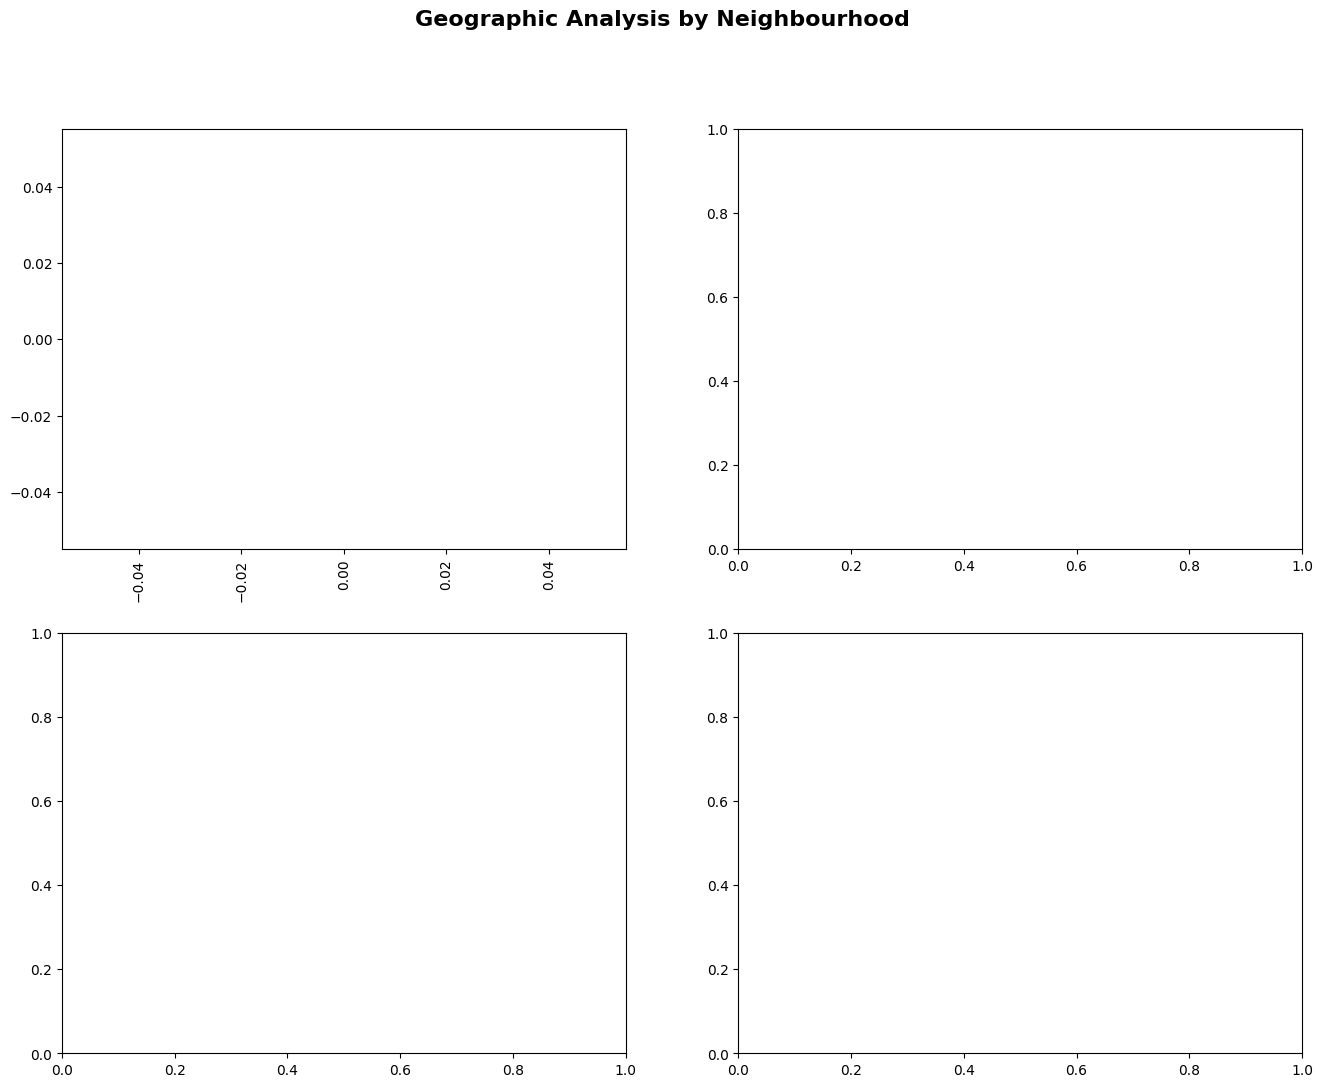

In [19]:
if joined_listings_gdf is not None:
    print("📊 GEOGRAPHIC ANALYSIS BY NEIGHBOURHOOD (FIXED)\n")
    
    # Find the neighbourhood column
    neighbourhood_cols = [col for col in joined_listings_gdf.columns 
                         if 'neighbourhood' in col.lower()]
    
    if neighbourhood_cols:
        neighbourhood_col = neighbourhood_cols[0]
        print(f"✅ Using neighbourhood column: {neighbourhood_col}")
        
        # Group by neighbourhood and calculate statistics
        neighbourhood_stats = joined_listings_gdf.groupby(neighbourhood_col).agg({
            'id': 'count'  # Count of listings
        }).rename(columns={'id': 'listing_count'})
        
        # Add price statistics if available (FIXED)
        price_cols = [col for col in joined_listings_gdf.columns if 'price' in col.lower()]
        if price_cols:
            price_col = price_cols[0]
            print(f"💰 Processing price column: {price_col}")
            
            # Check data type of price column
            print(f"📊 Price column data type: {joined_listings_gdf[price_col].dtype}")
            print(f"📊 Sample price values: {joined_listings_gdf[price_col].head()}")
            
            # Clean price data based on data type
            if joined_listings_gdf[price_col].dtype == 'object':
                # String data - clean it
                print("🧹 Cleaning string price data...")
                joined_listings_gdf[f'{price_col}_clean'] = pd.to_numeric(
                    joined_listings_gdf[price_col].astype(str).str.replace('$', '').str.replace(',', ''), 
                    errors='coerce'
                )
            else:
                # Numeric data - use as is
                print("📊 Using numeric price data as is...")
                joined_listings_gdf[f'{price_col}_clean'] = joined_listings_gdf[price_col]
            
            # Calculate price statistics
            price_stats = joined_listings_gdf.groupby(neighbourhood_col)[f'{price_col}_clean'].agg([
                'mean', 'median', 'std', 'min', 'max'
            ]).rename(columns={
                'mean': 'avg_price',
                'median': 'median_price',
                'std': 'price_std',
                'min': 'min_price',
                'max': 'max_price'
            })
            
            neighbourhood_stats = neighbourhood_stats.join(price_stats)
            
            print(f"✅ Price statistics calculated")
        
        # Add room type distribution if available
        room_cols = [col for col in joined_listings_gdf.columns if 'room_type' in col.lower()]
        if room_cols:
            room_col = room_cols[0]
            print(f"🏠 Processing room type column: {room_col}")
            
            room_distribution = joined_listings_gdf.groupby([neighbourhood_col, room_col]).size().unstack(fill_value=0)
            neighbourhood_stats = neighbourhood_stats.join(room_distribution)
            
            print(f"✅ Room type distribution calculated")
        
        print("\n📊 Neighbourhood Statistics:")
        print(neighbourhood_stats)
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Geographic Analysis by Neighbourhood', fontsize=16, fontweight='bold')
        
        # Plot 1: Listing count by neighbourhood
        neighbourhood_stats['listing_count'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
        axes[0, 0].set_title('Listings by Neighbourhood')
        axes[0, 0].set_ylabel('Number of Listings')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Plot 2: Average price by neighbourhood
        if 'avg_price' in neighbourhood_stats.columns:
            neighbourhood_stats['avg_price'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
            axes[0, 1].set_title('Average Price by Neighbourhood')
            axes[0, 1].set_ylabel('Average Price')
            axes[0, 1].tick_params(axis='x', rotation=45)
        
        # Plot 3: Price distribution
        if 'avg_price' in neighbourhood_stats.columns:
            axes[1, 0].scatter(neighbourhood_stats['listing_count'], neighbourhood_stats['avg_price'], s=100, alpha=0.7)
            axes[1, 0].set_title('Price vs Listings Count')
            axes[1, 0].set_xlabel('Number of Listings')
            axes[1, 0].set_ylabel('Average Price')
            
            # Add labels
            for idx, row in neighbourhood_stats.iterrows():
                axes[1, 0].annotate(idx, (row['listing_count'], row['avg_price']), 
                                   fontsize=8, ha='center', va='bottom')
        
        # Plot 4: Room type distribution
        if room_cols:
            room_distribution.plot(kind='bar', ax=axes[1, 1], stacked=True)
            axes[1, 1].set_title('Room Type Distribution by Neighbourhood')
            axes[1, 1].set_ylabel('Number of Listings')
            axes[1, 1].tick_params(axis='x', rotation=45)
            axes[1, 1].legend(title='Room Type')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Geographic analysis completed!")
        
    else:
        print("❌ No neighbourhood column found for analysis")
        neighbourhood_stats = None
    
else:
    print("❌ No joined dataset available for analysis")
    neighbourhood_stats = None

In [ ]:
print("🎯 GEOGRAPHIC ANALYSIS SUMMARY\n")

print("✅ Completed Analysis:")
print("   🗺️ Loaded neighbourhood boundaries")
print("   �� Created geographic points from listings")
print("   🔗 Performed spatial joins")
print("   📊 Analyzed neighbourhood statistics")
print("   🗺️ Created interactive maps")

if joined_listings_gdf is not None:
    print(f"\n📈 Key Insights:")
    print(f"   • Total listings analyzed: {len(joined_listings_gdf)}")
    print(f"   • Neighbourhoods covered: {joined_listings_gdf['neighbourhood'].nunique()}")
    
    if 'avg_price' in joined_listings_gdf.columns:
        avg_price = joined_listings_gdf['avg_price'].mean()
        print(f"   • Average price across all areas: ${avg_price:.2f}")
    
    print(f"\n�� Top Neighbourhoods by Listings:")
    top_neighbourhoods = joined_listings_gdf['neighbourhood'].value_counts().head(5)
    for neighbourhood, count in top_neighbourhoods.items():
        print(f"   • {neighbourhood}: {count} listings")

print("\n🚀 Recommended Next Steps:")
print("1. 🎯 Focus on specific neighbourhoods for detailed analysis")
print("2. 📈 Add time series analysis for seasonal patterns")
print("3. 🏠 Analyze property types and amenities by location")
print("4. 💰 Create pricing optimization models")
print("5. 🗺️ Build more detailed interactive maps")
print("6. 📊 Add demographic and economic data")

print("\n✅ Geographic analysis ready for advanced insights! 🗺️")